## Development Tools

NumPy, Pandas, Matplotlib basics

### Loading and Examining the Data

In [1]:
# import pandas library and give a short alias: pd
import pandas as pd
# import numpy with commonly-used alias: np
import numpy as np
import matplotlib.pyplot as plt 

# sets the size of plots in inches (1 inch = 2.54cm)
plt.rcParams["figure.figsize"] = (20, 7)
# sets the theme for plots to dark
plt.style.use('dark_background')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# head() method shows first 5 records, but we can change that with parameter ~ head(10)
df = pd.read_csv("../data/rent-ideal.csv")
df.head()

,bedrooms,bathrooms,latitude,longitude,price
0,1,1.0,40.7108,-73.9539,2400
1,2,1.0,40.7513,-73.9722,3800
2,2,1.0,40.7575,-73.9625,3495
3,3,1.5,40.7145,-73.9425,3000
4,0,1.0,40.7439,-73.9743,2795


In [3]:
# data sets with many columns are usually too wide to view on screen without scrolling 
# we can overcome by transposing (flipping) the data frame using the T property
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
bedrooms,1.0000,2.0000,2.0000,3.0000,0.0000,3.0000,3.0000,0.0000,1.0000,3.0000
bathrooms,1.0000,1.0000,1.0000,1.5000,1.0000,1.0000,2.0000,1.0000,0.0000,3.0000
latitude,40.7108,40.7513,40.7575,40.7145,40.7439,40.7348,40.7302,40.7769,40.7346,40.6990
longitude,-73.9539,-73.9722,-73.9625,-73.9425,-73.9743,-73.9865,-73.9826,-73.9467,-73.9811,-73.9943
price,2400.0000,3800.0000,3495.0000,3000.0000,2795.0000,7200.0000,6000.0000,1945.0000,2435.0000,6850.0000


In [4]:
# to get meta information about the data frame, use method info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   48300 non-null  int64  
 1   bathrooms  48300 non-null  float64
 2   latitude   48300 non-null  float64
 3   longitude  48300 non-null  float64
 4   price      48300 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.8 MB


In [5]:
# to learn about data itself we can use describe() method
df.describe()

,bedrooms,bathrooms,latitude,longitude,price
count,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000
mean,1.508799,1.178313,40.750782,-73.972365,3438.297950
std,1.092232,0.426120,0.039560,0.029563,1401.422247
min,0.000000,0.000000,40.571200,-74.094000,1025.000000
25%,1.000000,1.000000,40.728100,-73.991700,2495.000000
50%,1.000000,1.000000,40.751600,-73.977900,3100.000000
75%,2.000000,1.000000,40.774000,-73.954700,4000.000000
max,8.000000,10.000000,40.915400,-73.700100,9999.000000


In [6]:
# print the mean of every column
print(df.mean(), '\n')

# bedrooms number -> total apartments count
print(df.bedrooms.value_counts())

bedrooms        1.508799
bathrooms       1.178313
latitude       40.750782
longitude     -73.972365
price        3438.297950
dtype: float64 

1    15718
2    14451
0     9436
3     6777
4     1710
5      169
6       36
8        2
7        1
Name: bedrooms, dtype: int64


In [7]:
# sort data frame by price in descending order
df.sort_values('price', ascending=False).head()

,bedrooms,bathrooms,latitude,longitude,price
20589,3,3.0,40.7934,-73.9743,9999
3784,6,3.0,40.7287,-73.9856,9999
11598,6,3.0,40.7287,-73.9856,9999
43789,3,3.0,40.7602,-73.9597,9995
43085,2,2.5,40.7285,-73.9902,9995


### Extracting Subsets

In [8]:
# returns numpy series
# this is the same as df.price
price = df['price']

# on numpy series we can execute some useful functions
price.mean(), price.std(), price.max(), type(price)

(3438.297950310559, 1401.4222466501715, 9999, pandas.core.series.Series)

In [9]:
# extracting bathrooms and price columns to a new data frame
bath_price = df[['bathrooms','price']]
bath_price.head()

,bathrooms,price
0,1.0,2400
1,1.0,3800
2,1.0,3495
3,1.5,3000
4,1.0,2795


In [10]:
# extract features and target variable separately
X = df.drop('price', axis=1) # get all but price column
y = df['price']
X.head(3)

,bedrooms,bathrooms,latitude,longitude
0,1,1.0,40.7108,-73.9539
1,2,1.0,40.7513,-73.9722
2,2,1.0,40.7575,-73.9625


The `axis=1` bit is a little inconvenient but it specifies we'd like to drop a column and not a row (`axis=0`). The `drop()` method does not alter the dataframe; instead it returns a view of the dataframe without the indicated column.

In [11]:
# print rows from 5 to 9
display(df.iloc[5:10])

# print rows from 0 to 4
display(df.iloc[:5])

# print rows (with index) 1, 5, 7 and columns `bedrooms`, `bathrooms`
display(df.iloc[[1, 5, 7]][['bedrooms', 'bathrooms']])


,bedrooms,bathrooms,latitude,longitude,price
5,3,1.0,40.7348,-73.9865,7200
6,3,2.0,40.7302,-73.9826,6000
7,0,1.0,40.7769,-73.9467,1945
8,1,0.0,40.7346,-73.9811,2435
9,3,3.0,40.6990,-73.9943,6850


,bedrooms,bathrooms,latitude,longitude,price
0,1,1.0,40.7108,-73.9539,2400
1,2,1.0,40.7513,-73.9722,3800
2,2,1.0,40.7575,-73.9625,3495
3,3,1.5,40.7145,-73.9425,3000
4,0,1.0,40.7439,-73.9743,2795


,bedrooms,bathrooms
1,2,1.0
5,3,1.0
7,0,1.0


### DataFrame Indexes


In [12]:
# data frame has index by default going from 0 to total number of rows
display(df)

# iloc uses current index where value equals 10, loc returns 10th row of data frame
# currently it will return the same value
display(df.loc[10], df.iloc[10])

,bedrooms,bathrooms,latitude,longitude,price
0,1,1.0,40.7108,-73.9539,2400
1,2,1.0,40.7513,-73.9722,3800
2,2,1.0,40.7575,-73.9625,3495
3,3,1.5,40.7145,-73.9425,3000
4,0,1.0,40.7439,-73.9743,2795
...,...,...,...,...,...
48295,3,1.0,40.8433,-73.9396,2800
48296,2,1.0,40.8198,-73.9578,2395
48297,1,1.0,40.5765,-73.9554,1850
48298,2,1.0,40.7448,-74.0017,4195


bedrooms        0.0000
bathrooms       1.0000
latitude       40.7723
longitude     -73.9510
price        2785.0000
Name: 10, dtype: float64

bedrooms        0.0000
bathrooms       1.0000
latitude       40.7723
longitude     -73.9510
price        2785.0000
Name: 10, dtype: float64

In [13]:
# set new index `bedrooms`
# now we can't access the column 'bedrooms' ~ df['bedrooms']
dfi = df.set_index('bedrooms')

# dfi.loc[3] returns data frame where bedrooms = 3, dfi.iloc[3] returns 4th row
display(dfi.loc[3], dfi.iloc[3])

,bathrooms,latitude,longitude,price
bedrooms,,,,
3,1.5,40.7145,-73.9425,3000
3,1.0,40.7348,-73.9865,7200
3,2.0,40.7302,-73.9826,6000
3,3.0,40.6990,-73.9943,6850
3,1.0,40.7360,-73.9860,4450
...,...,...,...,...
3,2.0,40.7444,-73.9803,5800
3,1.5,40.7550,-73.9636,4600
3,2.0,40.7516,-73.9717,5000


bathrooms       1.5000
latitude       40.7145
longitude     -73.9425
price        3000.0000
Name: 3, dtype: float64

In [14]:
# to return the column bedrooms as column we need to reset the index
dfi = dfi.reset_index()
dfi.head()

,bedrooms,bathrooms,latitude,longitude,price
0,1,1.0,40.7108,-73.9539,2400
1,2,1.0,40.7513,-73.9722,3800
2,2,1.0,40.7575,-73.9625,3495
3,3,1.5,40.7145,-73.9425,3000
4,0,1.0,40.7439,-73.9743,2795


In [15]:
# let's calculate the mean of columns per number of bedrooms
bybedrooms = df.groupby(['bedrooms']).mean()

# now index is bedrooms but we want to reset that index
bybedrooms = bybedrooms.reset_index() # return to 'normal' index 0,1,2,... with column bedrooms
bybedrooms = bybedrooms[['bedrooms', 'price']]
bybedrooms

,bedrooms,price
0,0,2459.570051
1,1,3049.785087
2,2,3707.837727
3,3,4483.895972
4,4,5538.584211
5,5,6955.260355
6,6,7933.444444
7,7,6923.000000
8,8,8247.500000


### DataFrame Queries

In [16]:
# isnull() checks if value is missing
df.isnull().head()

,bedrooms,bathrooms,latitude,longitude,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [17]:
# checks if any value in any column is missing
df.isnull().any()

bedrooms     False
bathrooms    False
latitude     False
longitude    False
price        False
dtype: bool

In [18]:
# will return series with True where condition is true and False when it is false
# we can use this series to return all apartments with price greater than 30000
display(df.price > 3000)

# get all apartments where we have more then 3 bedrooms and rent is less than 2k
df[(df.bedrooms > 3) & (df.price < 2000)]

0        False
1         True
2         True
3        False
4        False
         ...  
48295    False
48296    False
48297    False
48298     True
48299     True
Name: price, Length: 48300, dtype: bool

,bedrooms,bathrooms,latitude,longitude,price
11932,4,3.0,40.7011,-73.9259,1225
21816,4,1.0,40.8399,-73.9222,1900
23855,5,2.0,40.8033,-73.9574,1025
25450,4,1.0,40.8399,-73.9222,1900
27607,4,4.0,40.6631,-73.9099,1503
42996,4,1.0,40.8175,-73.9408,1995


In [19]:
# add new column to the data frame
dfcopy = df.copy()
dfcopy['djordjidje'] = 10
dfcopy

,bedrooms,bathrooms,latitude,longitude,price,djordjidje
0,1,1.0,40.7108,-73.9539,2400,10
1,2,1.0,40.7513,-73.9722,3800,10
2,2,1.0,40.7575,-73.9625,3495,10
3,3,1.5,40.7145,-73.9425,3000,10
4,0,1.0,40.7439,-73.9743,2795,10
...,...,...,...,...,...,...
48295,3,1.0,40.8433,-73.9396,2800,10
48296,2,1.0,40.8198,-73.9578,2395,10
48297,1,1.0,40.5765,-73.9554,1850,10
48298,2,1.0,40.7448,-74.0017,4195,10


### String and Date Operations

In [20]:
# fake some dates
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2018-01-01')
dfdates = df.copy()
dfdates['dates'] = random_dates(start, end, n=48300)

In [21]:
# dates have some useful attributes grouped in `dt` for extracting various date attributes
# in order to treat dates as dates not as strings when loading data frame we have to use parse_dates=<array of columns>
display(dfdates['dates'].dt.dayofweek, dfdates['dates'].dt.day, dfdates['dates'].dt.month)

0        0
1        1
2        1
3        1
4        4
        ..
48295    3
48296    6
48297    3
48298    1
48299    3
Name: dates, Length: 48300, dtype: int64

0         6
1        16
2        27
3         7
4        22
         ..
48295    17
48296     1
48297    14
48298     5
48299    18
Name: dates, Length: 48300, dtype: int64

0         3
1         6
2        12
3        11
4         1
         ..
48295     8
48296     3
48297     4
48298     5
48299     2
Name: dates, Length: 48300, dtype: int64

### Saving and Loading DataFrames

In [22]:
# >>>> pd.to_csv(PATH), save as CSV 
# >>>> pd.read_csv(PATH), load CSV

# feather is a special data format
df.to_feather('../data/rent-ideal.feather') # save as feather
df = pd.read_feather('../data/rent-ideal.feather') # read from feather

### Generating Plots with Matplotlib

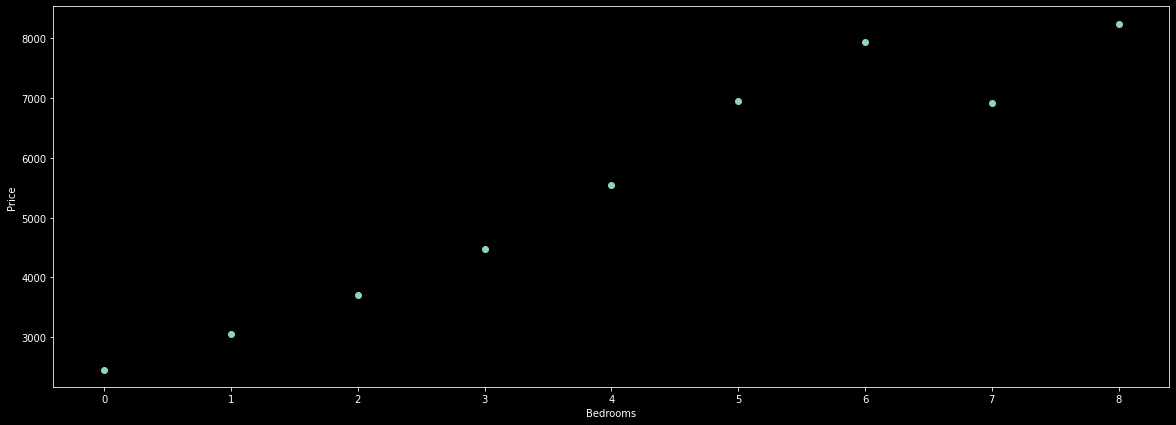

In [23]:
# calculate average price of the apartments per number of bedrooms
bybeds = df.groupby('bedrooms').mean()
bybeds = bybeds.reset_index()[['bedrooms', 'price']]

# draw bedrooms vs average price per number of bedrooms
figure, plot = plt.subplots()
plot.scatter(bybeds.bedrooms, bybeds.price)
plot.set_xlabel('Bedrooms')
plot.set_ylabel('Price');

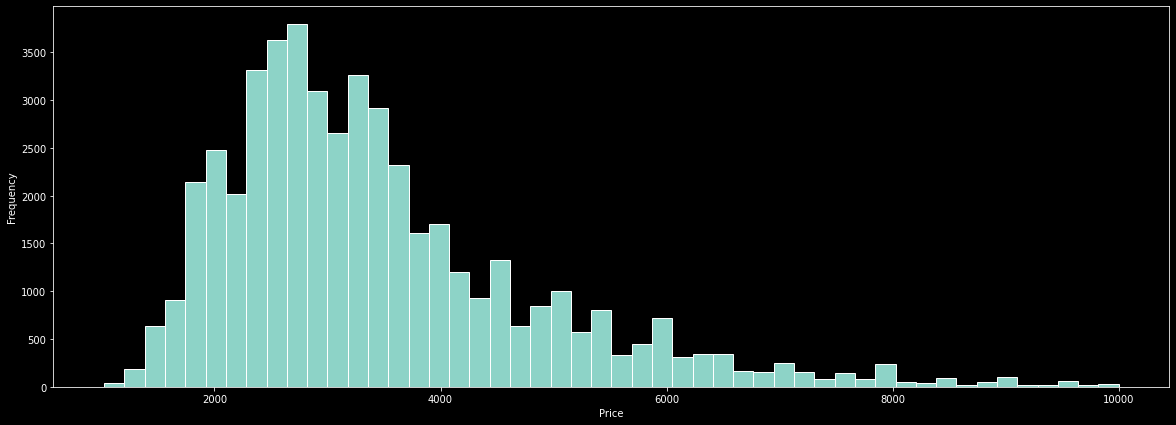

In [24]:
# draw histogram of price to see the price distribution
# we see that the average price is roughly $3000 and that there is a long “right tail” (with a few very expensive apartments)
figure, plot = plt.subplots()
plot.hist(df.price, bins=50, edgecolor='white')
plot.set_xlabel('Price')
plot.set_ylabel('Frequency');

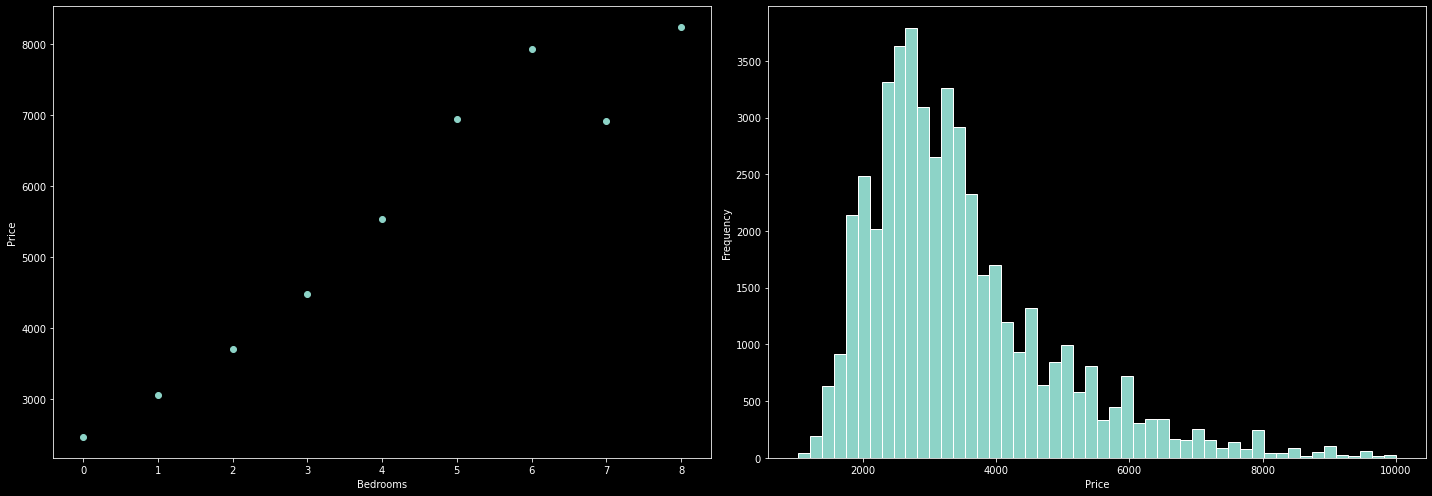

In [25]:
# draw figures side by side
figure, (subplotf, subplots) = plt.subplots(1, 2)

subplotf.scatter(bybeds.bedrooms, bybeds.price)
subplotf.set_xlabel('Bedrooms')
subplotf.set_ylabel('Price')

subplots.hist(df.price, bins=50, edgecolor='white')
subplots.set_xlabel('Price')
subplots.set_ylabel('Frequency');

# to adjust padding between the plots
plt.tight_layout()

### Representing and Processing Data with NumPy

In [26]:
# create 1D vector with 5 numbers
a = np.array([1,2,3,4,5])

print(f"type is {type(a)}")
print(f"dtype is {a.dtype}, 64-bit integer")
print(f"ndim is {a.ndim}, 1D array")
print(a)

type is <class 'numpy.ndarray'>
dtype is int64, 64-bit integer
ndim is 1, 1D array
[1 2 3 4 5]


In [27]:
# change type to 8-bit integers
a = a.astype(np.int8)
a[0] = 127
a[1] = 128
display(a)

array([ 127, -128,    3,    4,    5], dtype=int8)

In [28]:
# shape information is always a list or a tuple of length n for an n-dimensional array
zeros = np.zeros(shape=[5], dtype=np.int8)
ones = np.ones(shape=[5,2], dtype=np.int16)

# similar to range function (third argument is step)
range_ = np.arange(1,10,2)
display(zeros, ones, range_)

array([0, 0, 0, 0, 0], dtype=int8)

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int16)

array([1, 3, 5, 7, 9])

In [29]:
# when creating a sequence of evenly spaced floating-point numbers, use linspace
print(np.linspace(1,10,5))

# aside from the arithmetic operators, there are lots of common mathematical functions we can apply directly to arrays without resorting to Python loops:
prices = np.random.randint(low=1, high=10, size=5)
print(np.log(prices))
print(np.mean(prices))
print(np.max(prices))
print(np.sum(prices))

[ 1.    3.25  5.5   7.75 10.  ]
[2.19722458 1.94591015 0.         0.         1.38629436]
4.4
9
22


In [30]:
# matrix with 3 rows and 4 columns
a = np.random.random(size=(3,4))

# indexing and slicing numpy matrix
print(a[:,:], '\n')
print(a[1:3,:], '\n')
print(a[1:3,2:4], '\n')
print(a[1,2])

[[0.77322353 0.30920092 0.04621766 0.86797645]
 [0.57399811 0.12980628 0.39631115 0.82225593]
 [0.63033253 0.6556236  0.60433961 0.17524289]] 

[[0.57399811 0.12980628 0.39631115 0.82225593]
 [0.63033253 0.6556236  0.60433961 0.17524289]] 

[[0.39631115 0.82225593]
 [0.60433961 0.17524289]] 

0.39631114660196676


In [31]:
a = np.random.randint(0, 100, (5,4))

# flatten the matrix and sum it
np.sum(a.flat)

# the flat property is an iterator that is more space efficient than iterating 
# over u.ravel(), which is an actual 1D array of the matrix elements
display(a, a.ravel())

array([[21, 45, 71, 25],
       [20,  8, 30,  8],
       [65, 72, 60, 51],
       [92, 92, 44, 10],
       [44, 82,  1, 18]])

array([21, 45, 71, 25, 20,  8, 30,  8, 65, 72, 60, 51, 92, 92, 44, 10, 44,
       82,  1, 18])

In [32]:
a = np.arange(1, 25)

print('3x8 matrix \n', a.reshape(3, 8))
print('2x12 matrix \n', a.reshape(2, 12))
print('4x6 matrix \n', a.reshape(4, 6))

# one of the dimension arguments can be -1, which is kind of a wildcard
# numpy will calculate the other dimension
print('?x3 matrix \n', a.reshape(-1, 8))

3x8 matrix 
 [[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]]
2x12 matrix 
 [[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [13 14 15 16 17 18 19 20 21 22 23 24]]
4x6 matrix 
 [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
?x3 matrix 
 [[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]]


In [33]:
# extract numpy arrays from data frames
display(type(df.price.values), df.price.values)

display(df.iloc[0].values, df[['bedrooms','bathrooms']].values, type(df[['bedrooms','bathrooms']].values))

numpy.ndarray

array([2400, 3800, 3495, ..., 1850, 4195, 4280])

array([ 1.00000e+00,  1.00000e+00,  4.07108e+01, -7.39539e+01,
        2.40000e+03])

array([[1., 1.],
       [2., 1.],
       [2., 1.],
       ...,
       [1., 1.],
       [2., 1.],
       [3., 1.]])

numpy.ndarray